In [2]:
import pandas as pd
import numpy as np
import codecs as cd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid", color_codes=True)

import pytz
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [60]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

pd.pandas.set_option('display.max_columns', None)

import random
import warnings
warnings.filterwarnings('ignore')

In [61]:
df = pd.read_csv('skillsda.csv')

In [62]:
df.head()

,User_id,Course_id,C_difficulty,C_duration,Time_taken
0,1,1,3.0,3.0,4.5
1,2,2,2.5,1.5,2.0


In [64]:
rand_f = [0.5,1]
for i in range(1000):
    rand_row = {}
    rand_row['User_id'] = random.randint(1,10)
    rand_row['Course_id'] = random.randint(1,20)
    rand_row['C_difficulty'] = (rand_row['Course_id']%5)+rand_f[rand_row['Course_id']%2]
    rand_row['C_duration'] = (rand_row['Course_id']%7)+rand_f[rand_row['Course_id']%2]
    rand_row['Time_taken'] = round(((rand_row['C_difficulty']+rand_row['C_duration'])/2)*(2+random.random()),2)
    df = df.append(rand_row,ignore_index=True)

In [65]:
df.shape

(2002, 5)

In [66]:
df.head()

,User_id,Course_id,C_difficulty,C_duration,Time_taken
0,1.0,1.0,3.0,3.0,4.50
1,2.0,2.0,2.5,1.5,2.00
2,5.0,8.0,3.5,1.5,6.28
3,9.0,5.0,1.0,6.0,7.41
4,4.0,10.0,0.5,3.5,5.95


In [67]:
df['User_id'] = df['User_id'].astype('int')

In [68]:
df['Course_id'] = df['Course_id'].astype('int')

In [69]:
df.head(10)

,User_id,Course_id,C_difficulty,C_duration,Time_taken
0,1,1,3.0,3.0,4.50
1,2,2,2.5,1.5,2.00
2,5,8,3.5,1.5,6.28
3,9,5,1.0,6.0,7.41
4,4,10,0.5,3.5,5.95
5,2,16,1.5,2.5,4.76
6,5,14,4.5,0.5,5.29
7,7,17,3.0,4.0,7.59
8,3,10,0.5,3.5,4.55
9,3,6,1.5,6.5,11.27


In [100]:
df.to_csv('skillsda_gen.csv',index=False)

In [72]:
df1 = df.drop(columns=['Course_id'])
df1.groupby(['User_id']).mean()

,C_difficulty,C_duration,Time_taken
User_id,,,
1,2.646119,3.714612,7.879817
2,2.794118,4.112745,8.640147
3,2.526882,4.220430,8.393172
4,2.666667,3.845771,8.050746
5,2.730392,3.887255,8.261618
6,2.742718,4.063107,8.479854
7,2.502604,4.117188,8.282917
8,2.682990,3.868557,8.330155
9,2.628866,3.798969,7.962268


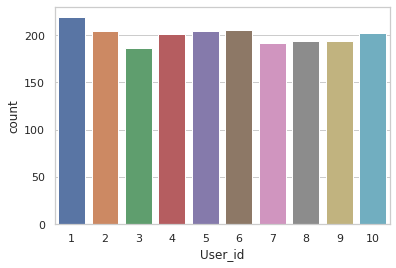

In [73]:
sns.countplot(df.User_id)

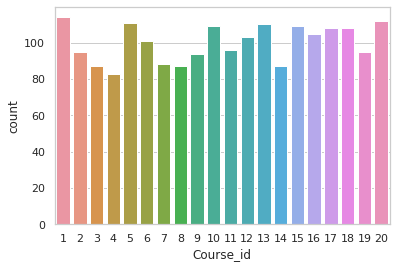

In [74]:
sns.countplot(df.Course_id)

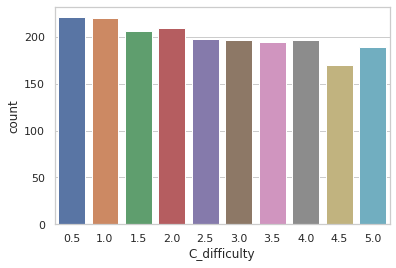

In [75]:
sns.countplot(df.C_difficulty)

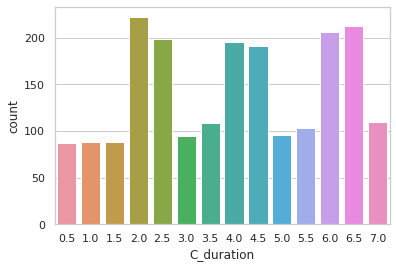

In [76]:
sns.countplot(df.C_duration)

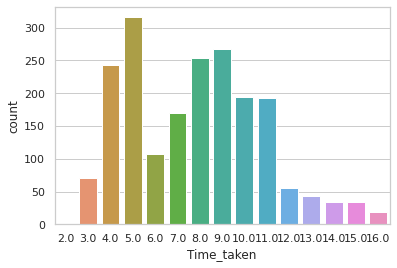

In [80]:
sns.countplot(df.Time_taken//1)

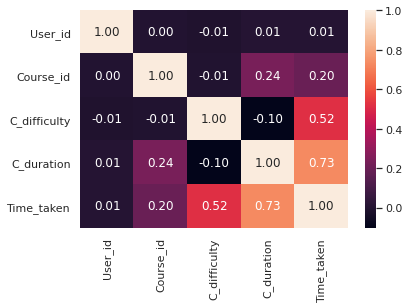

In [81]:
sns.heatmap(df[list(df.columns)].corr(), annot = True, fmt = ".2f")
plt.show()

In [82]:
data = df.drop(columns=['User_id','Course_id'])

In [83]:
data.head(20)

,C_difficulty,C_duration,Time_taken
0,3.0,3.0,4.50
1,2.5,1.5,2.00
2,3.5,1.5,6.28
3,1.0,6.0,7.41
4,0.5,3.5,5.95
5,1.5,2.5,4.76
6,4.5,0.5,5.29
7,3.0,4.0,7.59
8,0.5,3.5,4.55
9,1.5,6.5,11.27


In [93]:
x = data.iloc[:,:-1].values
y = df.loc[:,'Time_taken'].values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=101)

In [94]:
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

In [99]:
import pickle
filename = 'linear_skillsda.sav'
pickle.dump(regressor, open(filename, 'wb'))

In [95]:
y_pred = regressor.predict(x_test)

In [96]:
from sklearn.metrics import classification_report,confusion_matrix
import math
print("RMSE:",math.sqrt(mean_squared_error(y_test, y_pred)))
print("R2 score:",r2_score(y_test, y_pred))

RMSE: 1.0411403956642495
R2 score: 0.881656002596124
